In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']


os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
import src.visualization.webvisualization.visualization as vs
import src.data.dimensionality_reduction.HCF.preprocessing as pp
from src.data.labeler.labeler import anomaly_segmenter

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## load in df_data

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
object
object
None
None
None
None
None
sneaky
None
None
None
None
None
None
None
None
muren
None
None
None
None
None
None
None
None
None
None
None
None
object
object
object
object
object
None
None
None
None
None
None
sneaky
None
None
None
None
None
None
None
None
None
sneaky
None
None
sneaky
None
sneaky
None
sneaky
None
None
None
sneaky
None
sneaky
None
sneaky
None
sneaky
boven
None
None
None
None
None
None
None
None
None
None
None
sneaky
None
None
None
None
sneaky
None
None
sneaky
muren
None
None
None
None
None
None
None
None
None
None
None
None
None
object
None
None
sneaky
None
None
None
None
sneaky
None
None
boven
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
sneaky
None
None
None
None
None
None
None
sneaky
None
None
None
N

None
None
None
None
None
None
None
None
None
muren
None
None
None
None
None
muren
sneaky
None
False    1781
True      261
Name: label, dtype: int64


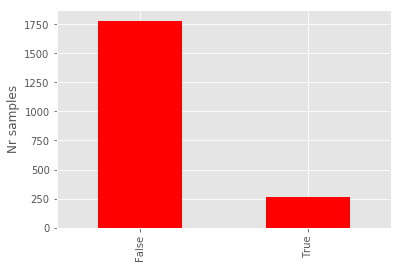

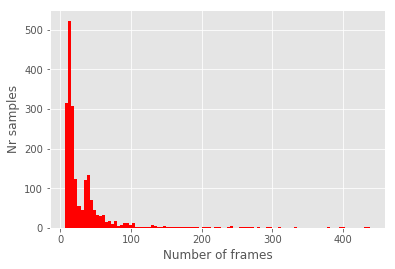

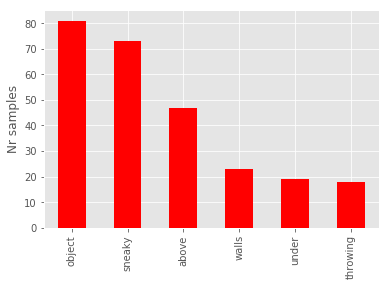

In [2]:
path       = './data/raw/configured_raw/'

list_names = os.listdir(path)
GD         =  pp.get_df(path)
df         =  GD.get_df_data(list_names)

show_dist  =  vs.get_df_vs()
show_dist.plot_label_dist(df)       
show_dist.plot_count_frames(df)       
show_dist.plot_segmentation(df)   

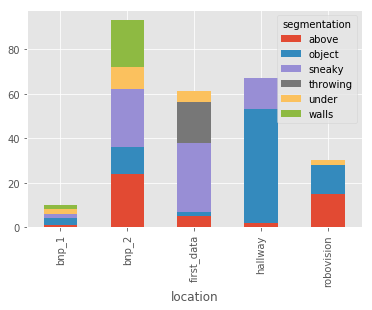

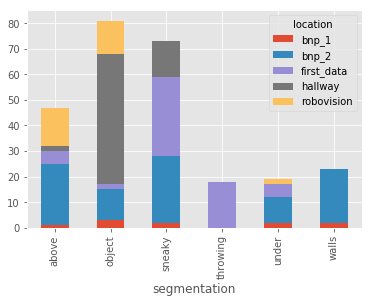

In [3]:
df_true = df[df['label'] == True]
df_true.groupby(['location', 'segmentation'])['location'].count().unstack('segmentation').plot(kind='bar', stacked=True)
df_true.groupby(['location', 'segmentation'])['segmentation'].count().unstack('location').plot(kind='bar', stacked=True)

#### play videos

In [4]:
bgs_vs = vs.bgs_vs()
bgs_vs.play_videos(df)

## functions BSG

#### stats

In [5]:
bgs_vs = vs.bgs_vs()

#### reconstruct

In [ ]:
bgs_vs.show_reconstructed_pic(df,2,5)

#### show proces

In [ ]:
bgs_vs.show_process(list_names[0],10)

### peak derivation

In [ ]:
dict_pg = {
    'resolution'     : 10,
    'area'           : 200,
    'min_h'          : 0,
    'max_h'          : 120,
    
    'max_p_h'        : 4,
    
    'path_save'      :'data/peak_detection/UP/'
    
}


pg_vs = vs.path_gen_vs(df,dict_pg)

In [ ]:
pg_vs.play_videos(0)

### labeler

In [ ]:
path = './data/raw/configured_raw/'

# add_segmentation(path).main()


list_names = os.listdir(path)

lab = anomaly_segmenter(path,list_names)
lab.play_videos()

In [ ]:
import signal
signal.SIGKILL